# Завдання

1. Напишіть код для стиснення зображення з використанням алгоритму JPEG.
2. Використовуючи бібліотеку gzip, напишіть код для стиснення текстового файлу.
3. Реалізуйте алгоритм Хаффмана для стиснення текстових даних. Напишіть код для стиснення та розпакування текстового файлу за допомогою цього алгоритму.

# Розв'язок

In [19]:
import os
import gzip
from PIL import Image
from matplotlib import pyplot as plt

### 1. Напишіть код для стиснення зображення з використанням алгоритму JPEG.

In [20]:
img = Image.open('lion.jpg')
img.save('lion_compressed.jpg', 'JPEG', quality=80)

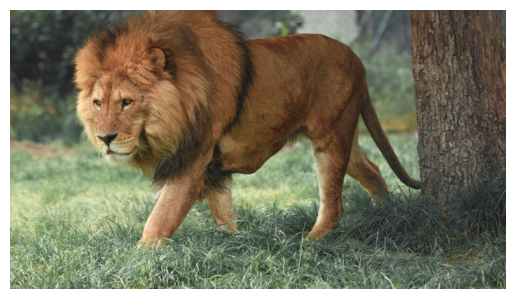

Розмір оригінального зображення у байтах:  122727


In [21]:
plt.axis('off')
plt.imshow(img)
plt.show()
print('Розмір оригінального зображення у байтах: ', os.path.getsize('lion.jpg'))

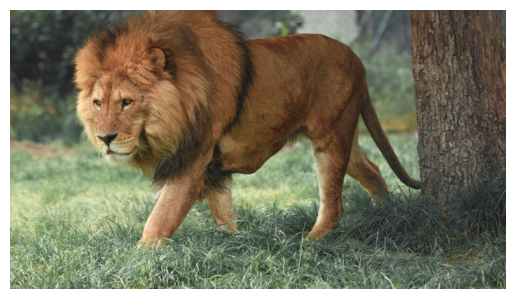

Розмір стисненого зображення у байтах:  70287


In [22]:
import os
plt.axis('off')
plt.imshow(img)
plt.show()
print('Розмір стисненого зображення у байтах: ', os.path.getsize('lion_compressed.jpg'))

### 2. Використовуючи бібліотеку gzip, напишіть код для стиснення текстового файлу.

In [23]:
with open('text.txt', 'rb') as file_in:
    with gzip.open('text.txt.gz', 'wb') as file_out:
        file_out.write(file_in.read())
print('Файл успішно стиснено!')
print('Розмір оригінального текстового файлу у байтах: ', os.path.getsize('text.txt'))
print('Розмір стисненого текстового файлу у байтах: ', os.path.getsize('text.txt.gz'))

Файл успішно стиснено!
Розмір оригінального текстового файлу у байтах:  3419
Розмір стисненого текстового файлу у байтах:  1249


### 3. Реалізуйте алгоритм Хаффмана для стиснення текстових даних. Напишіть код для стиснення та розпакування текстового файлу за допомогою цього алгоритму.

**3.1. Стиснення текстових даних.**

In [74]:
import heapq
from heapq import heappop, heappush
 
def isLeaf(root):
    return root.left is None and root.right is None
 
class Node:
    def __init__(self, ch, freq, left=None, right=None):
        self.ch = ch
        self.freq = freq
        self.left = left
        self.right = right
 
    def __lt__(self, other):
        return self.freq < other.freq
 
 
def encode(root, s, huffman_code):
    if root is None:
        return
 
    if isLeaf(root):
        huffman_code[root.ch] = s if len(s) > 0 else '1'
 
    encode(root.left, s + '0', huffman_code)
    encode(root.right, s + '1', huffman_code)
 
 
def decode(root, index, s):
    if root is None:
        return index
 
    if isLeaf(root):
        return index
 
    index = index + 1
    root = root.left if s[index] == '0' else root.right
    return decode(root, index, s)
 
 
def buildHuffmanTree(text):
    if len(text) == 0:
        return
 
    freq = {i: text.count(i) for i in set(text)}
 
    pq = [Node(k, v) for k, v in freq.items()]
    heapq.heapify(pq)
 
    while len(pq) != 1:
        left = heappop(pq)
        right = heappop(pq)
 
        total = left.freq + right.freq
        heappush(pq, Node(None, total, left, right))
 
    root = pq[0]
 
    huffmanCode = {}
    encode(root, '', huffmanCode)
 
    encoded_text = ''
    for c in text:
        encoded_text += huffmanCode.get(c)
 
    with open('text_compressed.txt', 'w') as f:
        f.write(encoded_text)
 
    print('Файл успішно стиснено!')
 
 
with open('text.txt', 'r') as f:
    text = f.read()
 
buildHuffmanTree(text)

Файл успішно стиснено!


**3.2. Розпакування текстових даних.**

In [75]:
def isLeaf(root):
    return root.left is None and root.right is None

class Node:
    def __init__(self, ch, freq, left=None, right=None):
        self.ch = ch
        self.freq = freq
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.freq < other.freq

def encode(root, s, huffman_code):
    if root is None:
        return

    if isLeaf(root):
        huffman_code[root.ch] = s if len(s) > 0 else '1'

    encode(root.left, s + '0', huffman_code)
    encode(root.right, s + '1', huffman_code)

def decode(root, index, s):
    if root is None:
        return index, ''

    if isLeaf(root):
        return index, root.ch

    index = index + 1
    root = root.left if s[index] == '0' else root.right
    return decode(root, index, s)

def buildHuffmanTree(text):
    if len(text) == 0:
        return

    freq = {i: text.count(i) for i in set(text)}

    pq = [Node(k, v) for k, v in freq.items()]
    heapq.heapify(pq)

    while len(pq) != 1:
        left = heappop(pq)
        right = heappop(pq)

        total = left.freq + right.freq
        heappush(pq, Node(None, total, left, right))

    root = pq[0]

    huffmanCode = {}
    encode(root, '', huffmanCode)

    encoded_text = ''
    with open('text_compressed.txt', 'r') as f:
        encoded_text = f.read()

    current_index = -1
    decoded_text = ''
    while current_index < len(encoded_text) - 2:
        current_index, char = decode(root, current_index, encoded_text)
        decoded_text += char

    with open('text_decompressed.txt', 'w') as f:
        f.write(decoded_text)

    print('Файл успішно розпаковано!')

with open('text.txt', 'r') as f:
    text = f.read()

buildHuffmanTree(text)

Файл успішно розпаковано!
